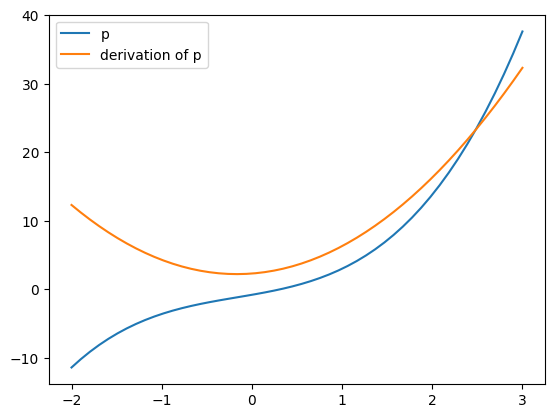

In [1]:
import numpy as np
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt

# Create a polynomial from coefficients -0.8, 2.3, 0.5, 1
# https://en.wikipedia.org/wiki/Polynomial 
p = Polynomial([-0.8, 2.3, 0.5, 1])
p_der = p.deriv() # return a derivative of this polynomial.

fig, ax = plt.subplots()
X = np.linspace(-2, 3, 50, endpoint=True) # return evenly spaced numbers over a specified interval
F = p(X)
F_derivative = p_der(X)
ax.plot(X, F)
ax.plot(X, F_derivative)

ax.legend(['p', 'derivation of p'])


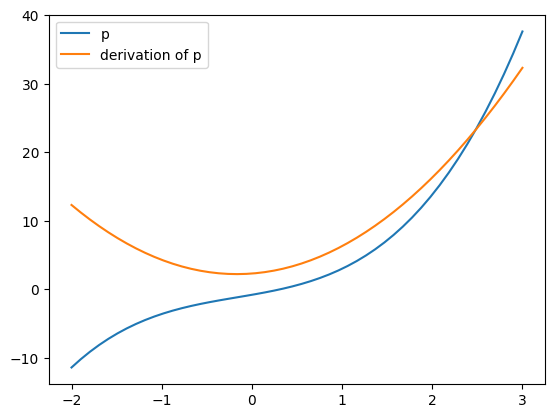

In [2]:
p = Polynomial([-0.8, 2.3, 0.5, 1])
p_der = p.deriv()

fig, ax = plt.subplots()
X = np.linspace(-2, 3, 50, endpoint=True)
F = p(X)
F_derivative = p_der(X)
ax.plot(X, F, label="p")                           # THIS LINE CHANGED
ax.plot(X, F_derivative, label="derivation of p")  # THIS LINE CHANGED

ax.legend(loc='upper left')                        # THIS LINE CHANGED


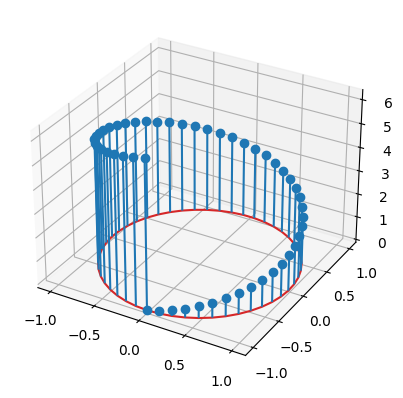

In [3]:
import matplotlib.pyplot as plt
import numpy as np

theta = np.linspace(0, 2*np.pi)
x = np.cos(theta - np.pi/2)
y = np.sin(theta - np.pi/2)
z = theta

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.stem(x, y, z)

plt.show()

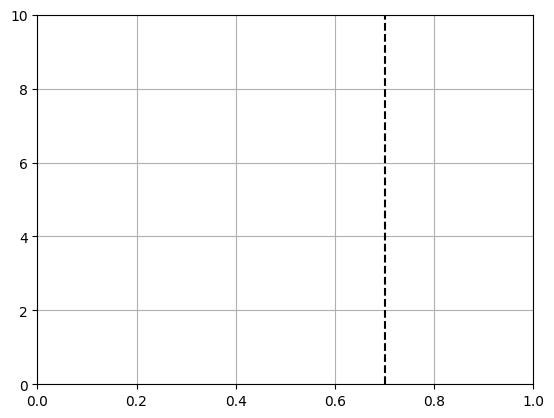

In [4]:
import math

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


def beta_pdf(x, a, b):
    return (x**(a-1) * (1-x)**(b-1) * math.gamma(a + b)
            / (math.gamma(a) * math.gamma(b)))


class UpdateDist:
    def __init__(self, ax, prob=0.5):
        self.success = 0
        self.prob = prob
        self.line, = ax.plot([], [], 'k-')
        self.x = np.linspace(0, 1, 200)
        self.ax = ax

        # Set up plot parameters
        self.ax.set_xlim(0, 1)
        self.ax.set_ylim(0, 10)
        self.ax.grid(True)

        # This vertical line represents the theoretical value, to
        # which the plotted distribution should converge.
        self.ax.axvline(prob, linestyle='--', color='black')

    def __call__(self, i):
        # This way the plot can continuously run and we just keep
        # watching new realizations of the process
        if i == 0:
            self.success = 0
            self.line.set_data([], [])
            return self.line,

        # Choose success based on exceed a threshold with a uniform pick
        if np.random.rand() < self.prob:
            self.success += 1
        y = beta_pdf(self.x, self.success + 1, (i - self.success) + 1)
        self.line.set_data(self.x, y)
        return self.line,

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots()
ud = UpdateDist(ax, prob=0.7)
anim = FuncAnimation(fig, ud, frames=100, interval=100, blit=True)
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt


class IndexTracker:
    def __init__(self, ax, X):
        self.index = 0
        self.X = X
        self.ax = ax
        self.im = ax.imshow(self.X[:, :, self.index])
        self.update()

    def on_scroll(self, event):
        print(event.button, event.step)
        increment = 1 if event.button == 'up' else -1
        max_index = self.X.shape[-1] - 1
        self.index = np.clip(self.index + increment, 0, max_index)
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.index])
        self.ax.set_title(
            f'Use scroll wheel to navigate\nindex {self.index}')
        self.im.axes.figure.canvas.draw()


x, y, z = np.ogrid[-10:10:100j, -10:10:100j, 1:10:20j]
X = np.sin(x * y * z) / (x * y * z)

fig, ax = plt.subplots()
# create an IndexTracker and make sure it lives during the whole
# lifetime of the figure by assigning it to a variable
tracker = IndexTracker(ax, X)

fig.canvas.mpl_connect('scroll_event', tracker.on_scroll)
plt.show()

In [17]:
import matplotlib.pyplot as plt
import numpy as np


# Fixing random state for reproducibility
np.random.seed(19680801)

x = np.linspace(0, 10)
with plt.style.context('Solarize_Light2'):
    plt.plot(x, np.sin(x) + x + np.random.randn(50))
    plt.plot(x, np.sin(x) + 2 * x + np.random.randn(50))
    plt.plot(x, np.sin(x) + 3 * x + np.random.randn(50))
    plt.plot(x, np.sin(x) + 4 + x + np.random.randn(50))
    plt.plot(x, np.sin(x) + 5 * x + np.random.randn(50))
    plt.plot(x, np.sin(x) + 6 * x + np.random.randn(50))
    plt.plot(x, np.sin(x) + 7 * x + np.random.randn(50))
    plt.plot(x, np.sin(x) + 8 * x + np.random.randn(50))
    # Number of accent colors in the color scheme
    plt.title('8 Random Lines - Line')
    plt.xlabel('x label', fontsize=14)
    plt.ylabel('y label', fontsize=14)

plt.show()